#  Stationary Processes

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

## Stochastic Processes
___
A stochastic process is a set of random variables $\{X_t\}_{t \in T}$ indexed for a subset of real numbers $T \subset \mathbb{R}$, for time series purpouses we asume the index set $T = \mathbb{N}$. Since $\{X_t\}$ its a family of random variables teh distribution of $\{X_t\}_{t \in \mathbb{N}}$  its given by:

$$ F_{X_{t1},...,X_{tn}} (x_1,...,x_n) = P[X_{t1}\leq x_1,...,X_{tn}\leq x_n]$$

Functions asociated to a stochastic process $X_t$:

* *Mean function:* $\mu_t = E[X_t]$
* *Variance function:* $\sigma^2_t = E[X_t-\mu_t]^2$
* *Covariance function:* $\gamma(t_1,t_2)=E[(X_{t_1}-\mu_{t_1})(X_{t_2}-\mu_{t_2})]$
* *Correlation function:* $\rho(t_1,t_2)=\frac{\gamma(t_1,t_2)}{\sqrt{\sigma^2_{t_1}}\sqrt{\sigma^2_{t_2}}}$


### Stationary processes

A stochastic process is said to be **strongly stationary** (first order stationary) if the distirbution of the process its T-invariant, i.e., the distribution don't depends of the index set T.

$$ F_{X_{t1},...,X_{tn}} (x_1,...,x_n) = F_{X_{t1+\tau},...,X_{tn+\tau}} (x_1,...,x_n) \qquad \forall \tau \geq 0$$

A stochastic process is said to be **weakly stationary** (second order stationary) if satisfy:
* $E[|X_t|] < \infty$ 
* $E[X_t^2] < \infty$ 
* $E[X_t] = E[X_{t+k}]$ 
* $E[X_t^2] = E[X_{t+k}^2]$ 

**Obervations:** 
* Strong stationarity $\implies$ weakly stationarity
* For a stationarity process the mean and the variace are constants: 
$$E[X_t]=\mu_t=\mu \quad V[X_t]=\sigma^2_t=\sigma^2$$
* For any $t_1, t_2, k \in \mathbb{Z}$, $\gamma(t_1, t_2)=\gamma(t_1+k, t_2+k)$ so $t_1 = t_1+k$ and $t_2 = t_2+k$ lets $t_1-k =t$ and $t_2=t$ then $\gamma(t_1, t_2)=\gamma(t-k,t)=\gamma(t,t+k)=\gamma(k)$ it means that $\gamma$ depends only of the difference k.
* For any $t_1, t_2, k \in \mathbb{Z}$, $\rho(t_1, t_2)=\rho(k)$ it means that $\rho$ depends only of the difference k.

### Functions asociated to a stationary process

Lets $X_t$ a sationary then the following functions asociated to the process are:

* *Autovariance function:* $\gamma(X_t,X_{t+k})=E[(X_{t}-\mu_{t})(X_{t+k}-\mu_{t+k})]=\gamma(k)$
* *Autocorrelation function:* $\rho(X_t,X_{t+k})=\frac{\gamma(X_t,X_{t+k})}{\sqrt{V[X_t]}\sqrt{V[X_{t+k}]}}=\frac{\gamma(k)}{\gamma(0)}$

**Properties**:
* $\gamma(0) = V[X_t]$ and $|\gamma(k)| \leq \gamma(0)$
* $\rho(0)=1$ and $|\rho(k)| \leq 1$
* $\rho(k)=\rho(-k)$ and $\gamma(k)=\gamma(-k)$


**Example: ** White noise process

A white noise $X_t \sim WN(0,\sigma^2)$ its a process such that $t \in \mathbb{R}$:
* $E[X_t]=0 \quad \forall$
* $V[X_t]=\sigma^2 \leq \infty$
* $Cov[X_t,Y_s]=0 \quad t \neq s$

A white noise is said to be gaussian noise if $X_t \sim N(0,\sigma^2)$. Gaussian noise process simulation

In [1]:
run tsUtils.py

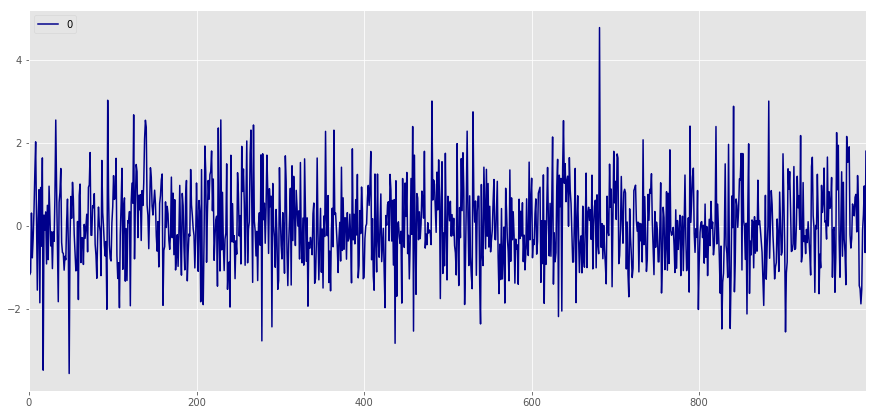

In [2]:
%matplotlib inline
import numpy as np
plt.style.use('ggplot')
num_samples = 1000
plotTimeSeries(pd.DataFrame(np.random.normal(0,1,size=num_samples)))

## Box Cox Transformation for Variance Stabilizing
___

Sometimes there are process $X_t$ who variance depends of t in form of deterministic function of the mean, that implies that the process $X_t$ are stationary in the mean but not are stationary in the variance. 

$$V[X_t]= c f(\mu_t)$$

Lets define a transformation $T$ such that the transformed process $T(X_t)$ has constant variance $c$. Lets suposse the desired function $f(\mu_t)$ has and Taylor series aproximation about the point $\mu_t$ i.e.

$$
\begin{align*}
T(X_t) &\approx T(\mu_t) + T'(\mu_t)(X_t - \mu_t)\\
V[T(X_t)] &= V[T(\mu_t) + T'(\mu_t)(X_t - \mu_t)]\\
 &= V[T'(\mu_t)(X_t - \mu_t)]\\
 &= (T'(\mu_t))^2V[X_t - \mu_t]\\
 &= (T'(\mu_t))^2V[X_t]\\
V[T(X_t)] &= T'(\mu_t)^2 (c f(\mu_t))\\
c &=  c (T'(\mu_t))^2  f(\mu_t)\\
1 &=  T'(\mu_t)^2  f(\mu_t)\\
T'(\mu_t) &=  \frac{1}{\sqrt{f(\mu_t)}}\\
\int T'(\mu_t) &= \int \frac{d \mu_t}{\sqrt{f(\mu_t)}}\\
T(\mu_t) &= \int \frac{d \mu_t}{\sqrt{f(\mu_t)}}\\
\end{align*}
$$

Box and Cox introduced the following function, if $V[X_t] = c \mu_t^{2(\lambda-1)}$ then:

$$
\begin{align*}
T(\mu_t) &= \int \frac{d \mu_t}{\mu_t^{\lambda-1}}\\
T(X_t) &= \frac{X_t^\lambda-1}{\lambda} \quad if \quad \lambda \neq 0\\
T(X_t) &= Ln(X_t) \quad if \quad \lambda = 0\\
\end{align*}
$$

The solution of this integral provides many different transformations. One of the advantages of use this transformation is that the choosing of $\lambda$ could be obtained from the data following the next algorithm:

1) Select a rank ordered of lambda values $[\lambda_0,...,\lambda_m]$

2) Compute the geometric mean:
$$\tilde{X_t}=\left( \prod_{t=1}^n X_t \right)^{1/n}$$

3) For each $\lambda_i \in [\lambda_0,...,\lambda_m]$ compute: 
$$X_t^{(\lambda_i)}=\frac{X_t^{\lambda_i}-1}{\lambda_i  \tilde{X_t}^{\lambda_I-1}}$$

4) Calculate the statistical residuals and select the $\lambda_i$ whose likelihood is the highest under the hypothesis of normality on $X_t^{(0)}=Ln(X_t)\tilde{X_t}$

**Example**: Airline Passengers

A simple exploration cheking the plot of the data series, show there is a lack of stationarity in the variance about the mean.

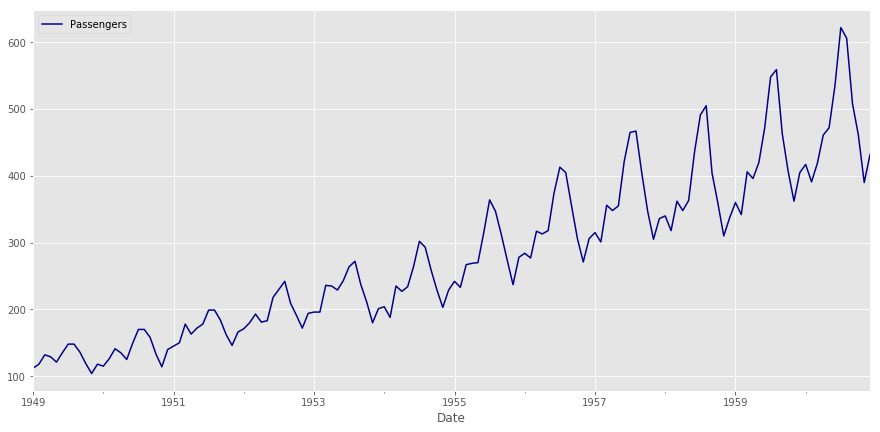

In [3]:
AirlinePassengersDF = pd.read_csv('DataSets/AirlinePassengers.csv')
AirlinePassengersDF['Date'] = pd.to_datetime(AirlinePassengersDF['Date'],format='%Y/%m')
AirlinePassengersDF = AirlinePassengersDF.set_index('Date')
plt.style.use('ggplot')
plotTimeSeries(AirlinePassengersDF)

lambda value: 0.14802256545


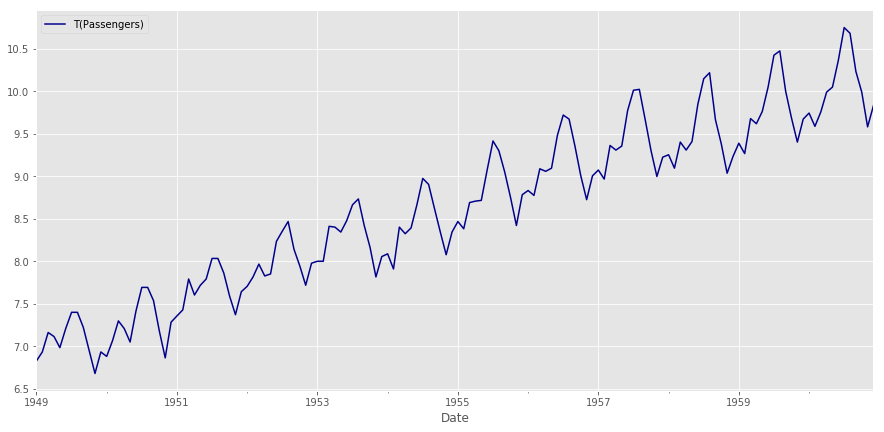

In [4]:
from scipy.stats import boxcox
plt.style.use('ggplot')
AirlinePassengersDF['T(Passengers)'], lmbda = boxcox(AirlinePassengersDF['Passengers'])
print('lambda value: '+str(lmbda))
plotTimeSeries(AirlinePassengersDF[['T(Passengers)']])

**Remarks about BoxCox transformations**

The Box-Cox power transformation is not a guarantee for normality. This is because it actually does not really check for normality; the method checks for the smallest standard deviation. The assumption is that among all transformations with Lambda values between -5 and +5, transformed data has the highest likelihood – but not a guarantee – to be normally distributed when standard deviation is the smallest. Therefore, it is absolutely necessary to always check the transformed data for normality using a probability plot.

Additionally, the Box-Cox Power transformation only works if all the data is positive and greater than 0. This, however, can usually be achieved easily by adding a constant to all data such that it all becomes positive before it is transformed.


## Backshift and difference operators
___

Lets $X_t$ a stochastic process: 
* The the backshift (Lag) operator B is defined as $B(X_t) = X_{t-1}$ so that $B^k(X_t)=X_{t-k}=(X_t)B^k$
* The difference operator $\nabla$ is defined as $\nabla(X_t)=X_t-X_{t-1}$

**Properties** Lets $X_t$, $Y_t$ processes and $\alpha \in \mathbb{R}$ then:
* If $X_t$ stationary then $B(X_t)$ its stationary.
* If $X_t$ stationary then $\nabla_s(X_t)$ its stationary.
* B its a linear operator. $B(X_t+\alpha Y_t) = B(X_t)+\alpha B(Y_t)$
* $\nabla$ its a linear operator. $\nabla(X_t+\alpha Y_t) = \nabla(X_t)+\alpha \nabla(Y_t)$
* If $\alpha$ constant, then $B(\alpha)=\alpha$
* If $\alpha$ constant, then $\nabla(\alpha)=\alpha$

From the last definitions its possible derive the concept of lag polinomials, so that if $\alpha_1,...,\alpha_k \in \mathbb{R}$ the lag polinomial asociated to the process 

$$
\alpha_1 X_t+\alpha_2 X_{t-2}+...+\alpha_k X_{t-k} = (\alpha_1+\alpha_2B^2+...+\alpha_k B^k) X_t = \left(\sum_{i=0}^k B^k\right) X_t = P(B) X_t
$$

**Observation**:
* $\nabla(X_t)=X_t-X_{t-1} = X_t-B X_{t} = (1-B) X_t$

**Theorem**: Lets $m^k(t)=\alpha_k t^k$ then the result to apply the difference operator to $m^k(t)$ produces a polynomial $p_{k-1}(t)$ with degree $k-1$

**proof:**
$$
\begin{align*}
\nabla(m^k_t) &= \alpha_k t^k - \alpha_k (t-1)^k \\ 
&= \alpha_k t^k - \alpha_k \left(\sum_{i=0}^k {{k}\choose{i}} t^{k-i} (-1)^i \right) \\ 
&= \alpha_k t^k - \alpha_k \left(t^k + \sum_{i=1}^k (-1)^i  {{k}\choose{i}} t^{k-i}\right) \\ 
&= \alpha_k t^k - \alpha_k t^k + \left( \sum_{i=1}^k - \alpha_k (-1)^i {{k}\choose{i}} t^{k-i} \right) \\ 
&= \sum_{i=1}^k - \alpha_k (-1)^i {{k}\choose{i}} t^{k-i} \\ 
&= \sum_{i=1}^k \alpha'_i t^{k-i} \\ 
\nabla(m_t)  &= p^{k-1}(t) \\ 
\end{align*}
$$

**Observation**: 
* If $p^1(t)=\alpha0+\alpha_1t$ then $\nabla(p^1(t))$ produces a constant $p^0(t)$.

$$\nabla(p^1(t))=\alpha0+\alpha_1t-\alpha0-\alpha_1(t-1)=\alpha_1=p^0(t)$$

**Theorem**: Lets $p^k(t)$ a polynomial of degree $k$ then the result to apply the difference operator to $p^k(t)$ produces a polynomial $p'^{k-1}(t)$ with degree $k-1$

**proof:**

$$
\begin{align*}
p^k(t) &= \sum_{j=0}^k \alpha_j t^j\\
\nabla(p^k(t)) &= \nabla \left( \alpha_0 + \sum_{j=1}^k \alpha_j t^j\right)\\
 &= \nabla(\alpha_0) +\sum_{j=1}^k \nabla ( \alpha_j t^j )\\
 &= \alpha_0+\sum_{j=1}^k p_i^{j-1}(t)\\
 &= \alpha_0+\sum_{i=1}^{k-1} p_i^i (t)\\
 &= \sum_{i=0}^{k-1} p_i^i (t)\\
\nabla(p^k(t)) &= p'^{k-1}(t)\\
\end{align*}
$$

**Corolary**: 

Lets deffine $\nabla^k = \nabla \circ ... \circ \nabla$ as the composition of $\nabla$ k times $ k \geq 1$, then:

* If $X_t$ stationary then $\nabla^k(X_t)$ its stationary.

* $\nabla^k$ is linear

* $\nabla^k = (1-B)^k = \sum_{i=0}^k {{k}\choose{i}}(-B)^k $

* $\nabla^{k-1}$ applied to a monomial $m^k(t)$ with degree $k$ produces a polynomial with degree 1:

$$
\begin{align*}
\nabla^{k-1}(m^k(t))&=\nabla^{k-2} ( \nabla (m^k(t))) \\
&=\nabla^{k-2} ( q_1^{k-1}(t) ) \\
&=\nabla^{k-3}( \nabla( q_1^{k-1}(t) ) ) \\
&=\nabla^{k-3}( q_2^{k-2}(t) ) \\
\vdots\\
&=\nabla^{k-k+1}( q_{k-2}^{k-k+2}(t) ) \\
&=\nabla ( q_{k-2}^{2}(t) ) \\
\nabla^{k-1}(m^k(t)) &= q_{k-1}^{1}(t) \\
\end{align*}
$$


**Theorem**: Lets $p^k(t)$ a polynomial of degree $k$ then the result to apply k-times the difference operator to $p^k(t)$ produces a constant polynomial

**proof:** Using induction over k, the base case when k=1 $\nabla(p^1(t))$ produces a constant $p^0(t)$.

Induction hypotesis: Suposse that its true for k that $\nabla^k(p^k(t)) = p^0(t)$. Lets proof for $k+1$

$$
\begin{align*}
p^{k+1}(t) &= \sum_{j=0}^{k+1} \alpha_j t^j\\
\nabla^{k+1}(p^{k+1}(t)) &= \nabla(\nabla^{k}(p^{k+1}(t)))\\
& = \nabla \left( \nabla^k \left(\sum_{j=0}^{k+1} \alpha_j t^j \right)  \right) \\
& = \nabla \left( \nabla^k \left(\alpha_{k+1} t^{k+1} + \sum_{j=0}^{k} \alpha_j t^j \right)  \right) \\
& = \nabla ( \nabla^k ( \alpha_{k+1} t^{k+1} + p^{k}(t) ) ) \\
& = \nabla ( \nabla^k ( \alpha_{k+1} t^{k+1} ) + \nabla^k ( p^{k}(t) ) ) \\
& = \nabla ( q_{k}^{1}(t)+  p^0 (t)) \\
& = \nabla ( q_{k}^{1}(t))+ \nabla ( p^0 (t)) \\
& = q^0 (t)+p^0(t)\\
\nabla^{k+1}(p^{k+1}(t))  & = r^0(t)\\
\end{align*}
$$

Where $r^0(t)$ its a constant polynomial.

Lets deffine the following operator $\nabla_s(X_t) = X_t - X_{t-s}=(1-B^s)X_t$ 

* If $X_t$ stationary then $\nabla_s(X_t)$ its stationary.

* $\nabla_s(X_t)$ its linear operator.

* Lets *stationality* $S(t)$ periodic function, with period $s$, such as $S(t)=S(t+s)$ then:
$$\nabla_s(S(t)) = S(t)-S(t-s) = S(t)-S(t-s+s)=S(t)-S(t)=0$$

* When $s=1$ then $\nabla = \nabla_s$

* $\nabla_s \circ \nabla^k = \nabla^k \circ \nabla_s$

### Further Implications for stationarity

**Lemma** Lets the process $Z_t = T_t + S_t + X_t$ where: 
* $T_t$ *trend* its a polynomial with degree $k$.
* $S_t$ *stationality* its a periodic function with period $s$.
* $X_t$ its a stationarity process.

Then $\nabla_s \circ \nabla^k$  applied to $Z_t$ produces a stationary process

**proof:**

$$
\begin{align*}
\nabla_s \circ \nabla^k (Z_t) &= \nabla_s ( \nabla^k (Z_t))\\
&= \nabla_s ( \nabla^k ( T_t + S_t + X_t))\\
&= \nabla_s ( \nabla^k ( T_t)) +\nabla_s ( \nabla^k (S_t)) + \nabla_s (\nabla^k ((X_t))\\
&= \nabla_s ( \nabla^k ( T_t)) +\nabla^k ( \nabla_s (S_t)) + \nabla_s (\nabla^k ((X_t))\\
\nabla_s \circ \nabla^k (Z_t)  &= p^0(t) + 0 + \nabla_s (\nabla^k ((X_t))\\
\end{align*}
$$

Where $\nabla_s (\nabla^k ((X_t))$ its stationary because $X_t$ its stationary, so, $ p^0(t) + \nabla_s (\nabla^k ((X_t))$ its stationary.

**Example:** 

Consider the following process $X_t =t^2+2Sin(6\pi t)+\epsilon_t$ where $\epsilon_t \sim(0,1)$

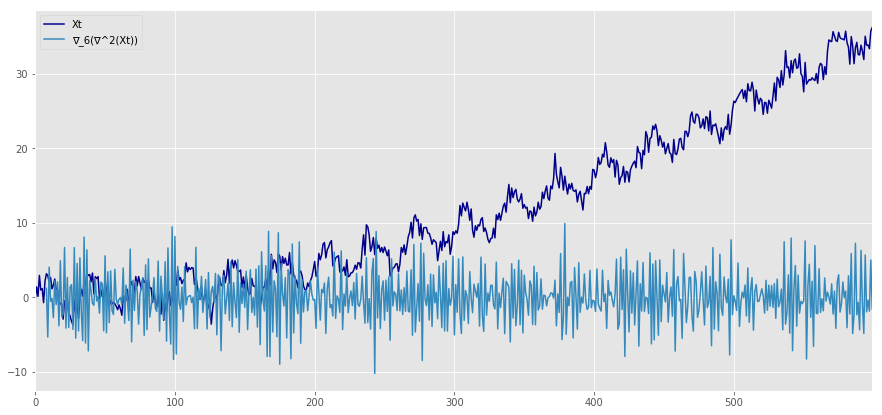

In [5]:
%matplotlib inline
import numpy as np
plt.style.use('ggplot')
Xt = [t**2+2*np.sin(6*np.pi*t)+np.random.normal(0,1) for t in np.linspace(0,6,600)]
processXt = pd.DataFrame(Xt,columns=['Xt'])
processXt['∇_6(∇^2(Xt))'] = processXt[['Xt']].diff(1).diff(1).diff(6)
plotTimeSeries(processXt)

**Example:** Making the airlines passenger time series stationary

Appling the operator $\nabla$ to the passengers data, but its not possible to appreciate stationarity because the average doesnt look to be constant. However the trend disappears but the seasonality not

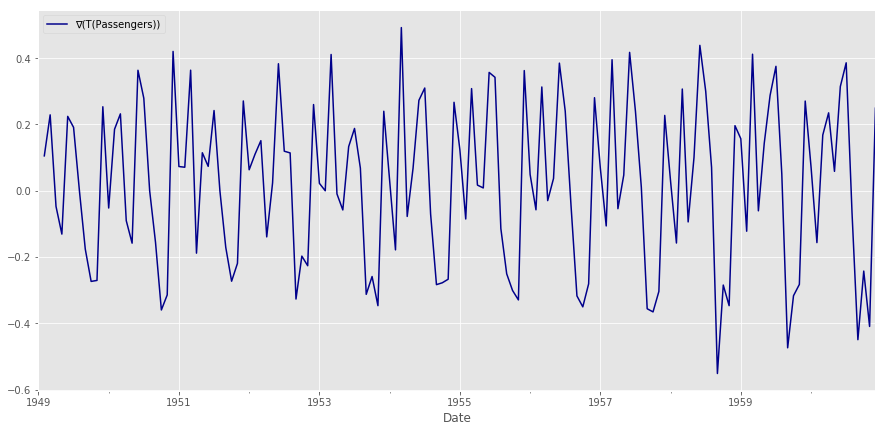

In [6]:
AirlinePassengersDF[['∇(T(Passengers))']] = AirlinePassengersDF[['T(Passengers)']].diff(1)
plotTimeSeries(AirlinePassengersDF[['∇(T(Passengers))']])

Appling the operator $\nabla_{12}$ to the passengers data, but its not possible to appreciate stationarity because the average doesnt look to be constant. However the seasonality disappears but the trend not.

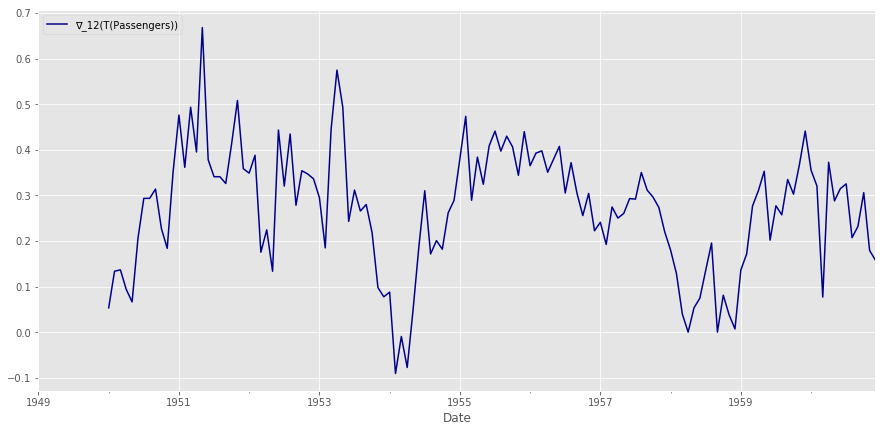

In [7]:
AirlinePassengersDF[['∇_12(T(Passengers))']] = AirlinePassengersDF[['T(Passengers)']].diff(12)
plotTimeSeries(AirlinePassengersDF[['∇_12(T(Passengers))']])

Appling the operator $\nabla_{12} \circ \nabla$ to the passengers data, the trend and seasonality disappear. And its possible appreciate a stationary pattern.

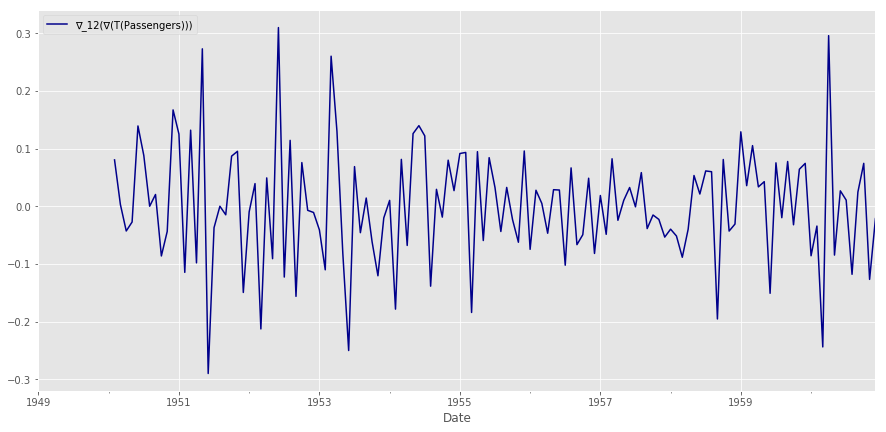

In [8]:
AirlinePassengersDF[['∇_12(∇(T(Passengers)))']] = AirlinePassengersDF[['T(Passengers)']].diff(1).diff(12)
plotTimeSeries(AirlinePassengersDF[['∇_12(∇(T(Passengers)))']])